In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-a6wrgd_u because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [9]:
# file = uproot.open("data/GenInfo_only_90.root")
file = uproot.open("../analysis_run3/GenInfo_ATo2Tau/CMSSW_13_0_17/src/Gen/Ntuples/GenInfo_Tau_m1p8To3p6_pt30To300.root")
RHTree = file["fevt/RHTree"]

In [10]:
RHTree.keys()
# RHTree.typenames()
# RHTree.show()

['Event',
 'Run',
 'LumiSection',
 'GenTau_inv',
 'GenA1',
 'dR_A1_Tau1',
 'A1_pt',
 'Tau1_pt',
 'A1_eta',
 'Tau1_eta',
 'A1_phi',
 'Tau1_phi']

In [5]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_A_2Tau_genInfo_traing'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = False

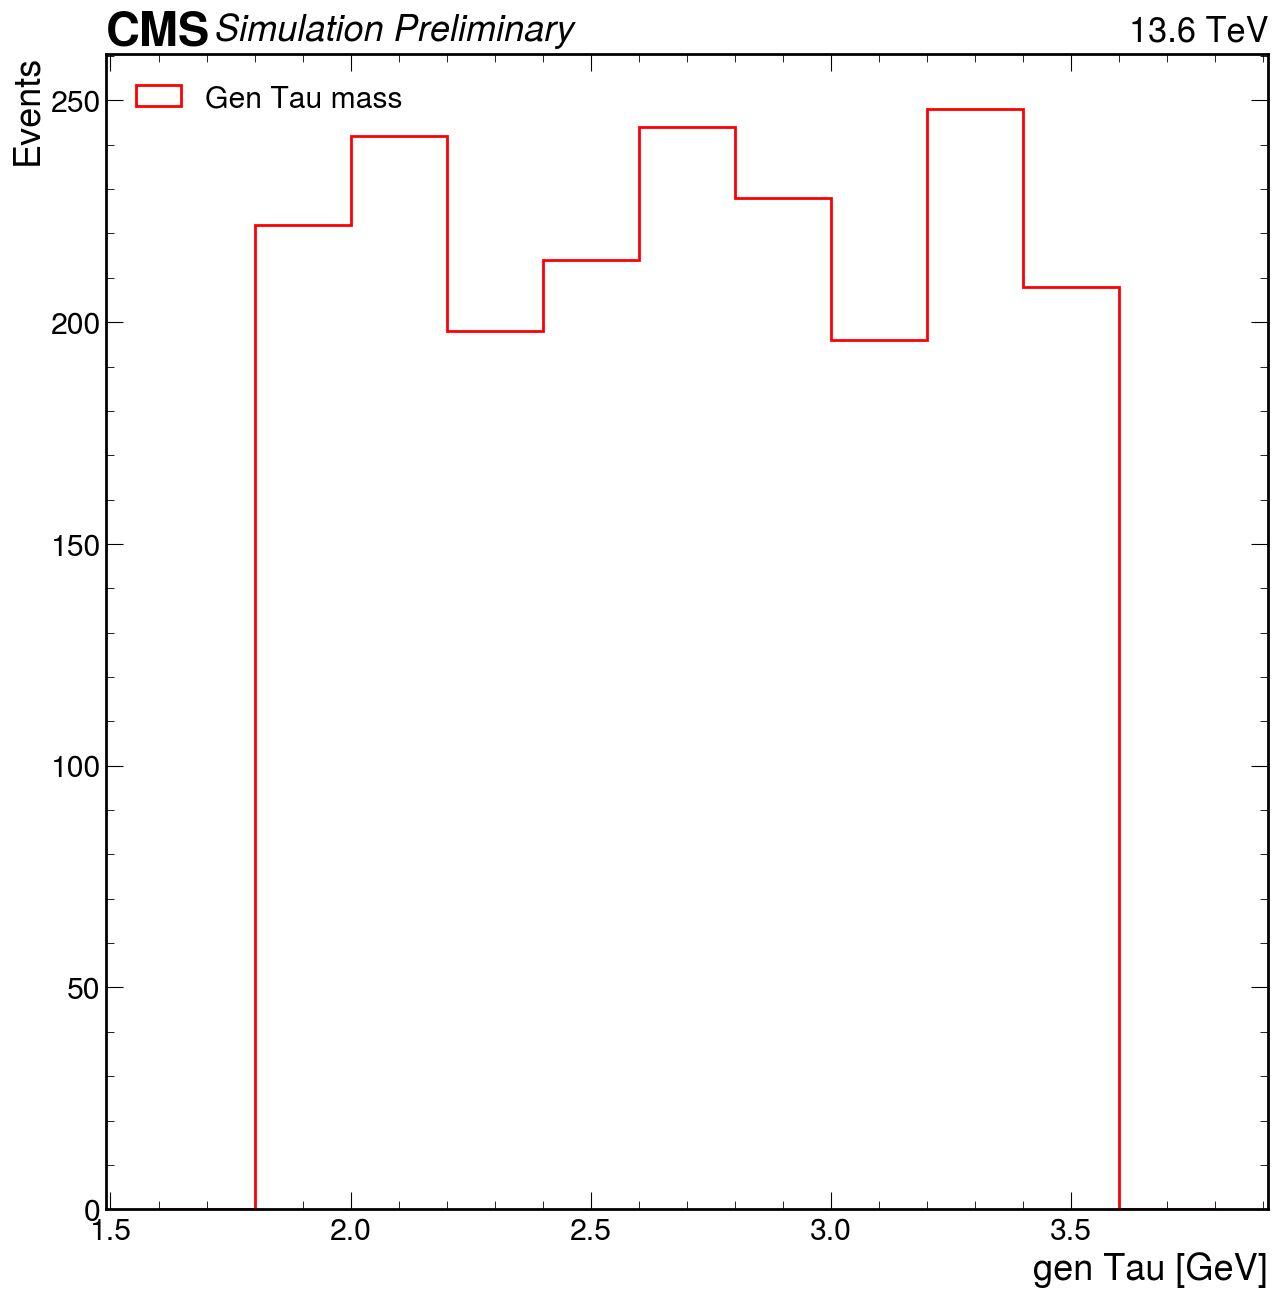

In [18]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1,bins=np.arange(1.6,3.9,0.2),histtype='step',linestyle='-',linewidth=2, color='red',label="Gen Tau mass")
# plt.xticks(np.arange(3.6,17,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

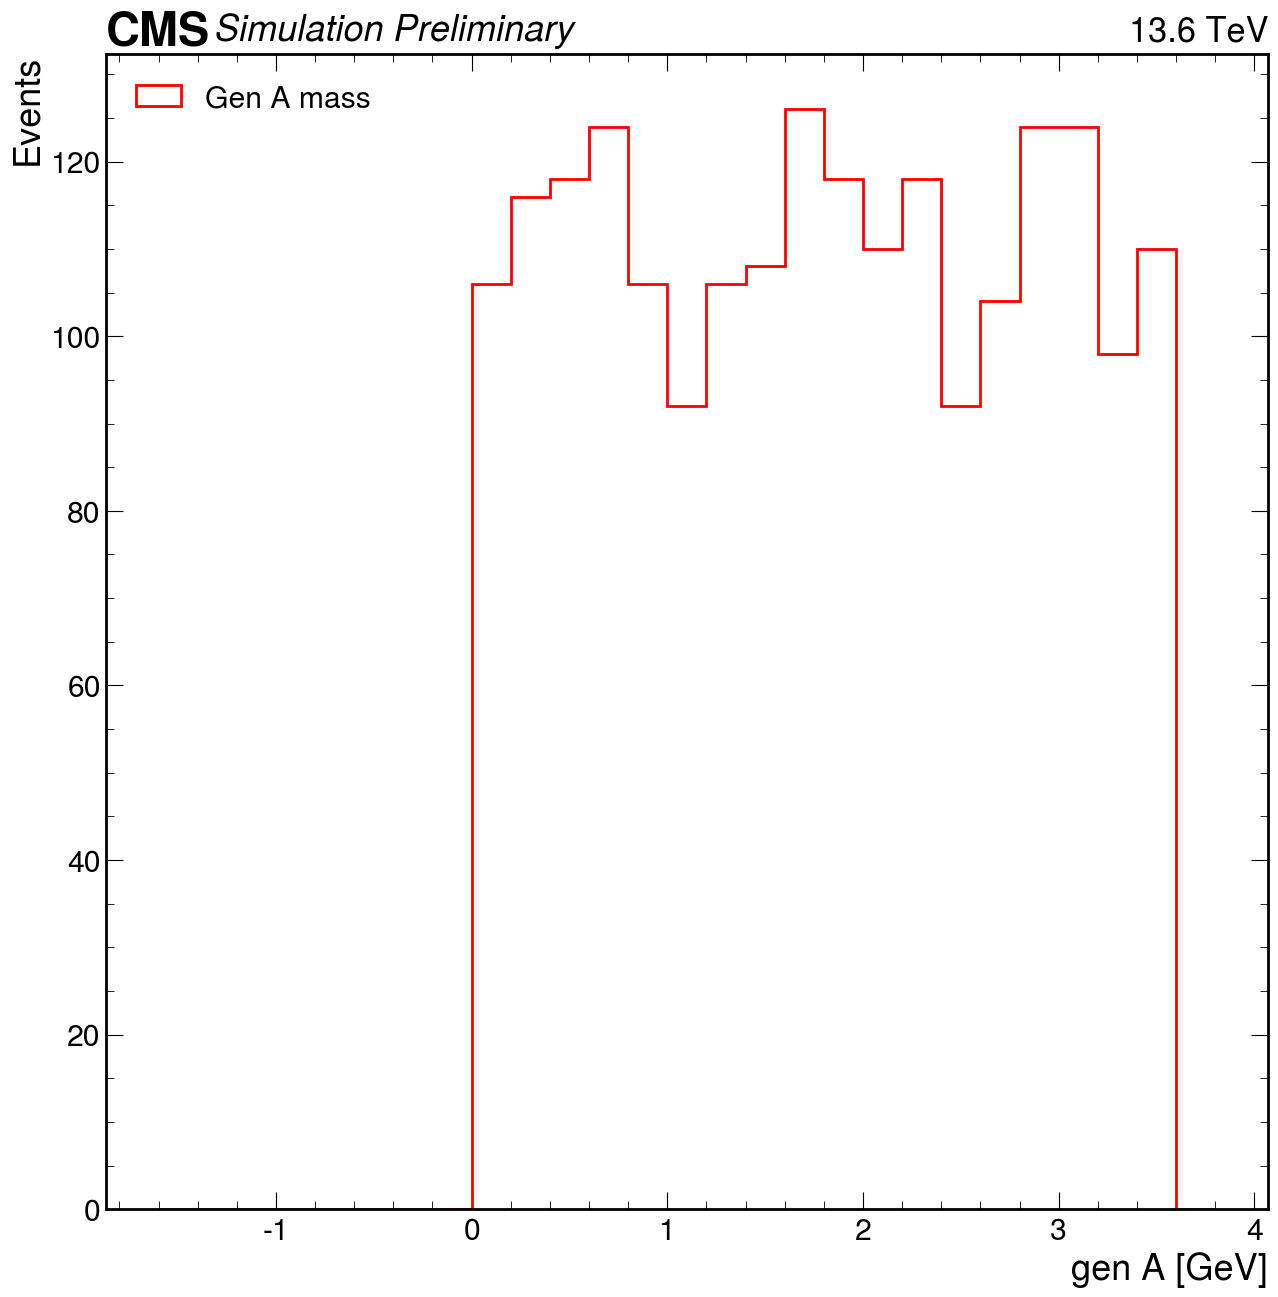

In [14]:
def new_mass(m_old):
    m_old_min = 1.8
    m_old_max = 3.6
    m_new_min = 0
    m_new_max = 3.6
    m_new = (m_old - m_old_min)/(m_old_max-m_old_min)*(m_new_max-m_new_min) + m_new_min
    return m_new

GenA1_ = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
GenA1 = new_mass(GenA1_)
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1,bins=np.arange(-1.6,3.9,0.2),histtype='step',linestyle='-',linewidth=2, color='red',label="Gen A mass")
# plt.xticks(np.arange(3.6,17,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()


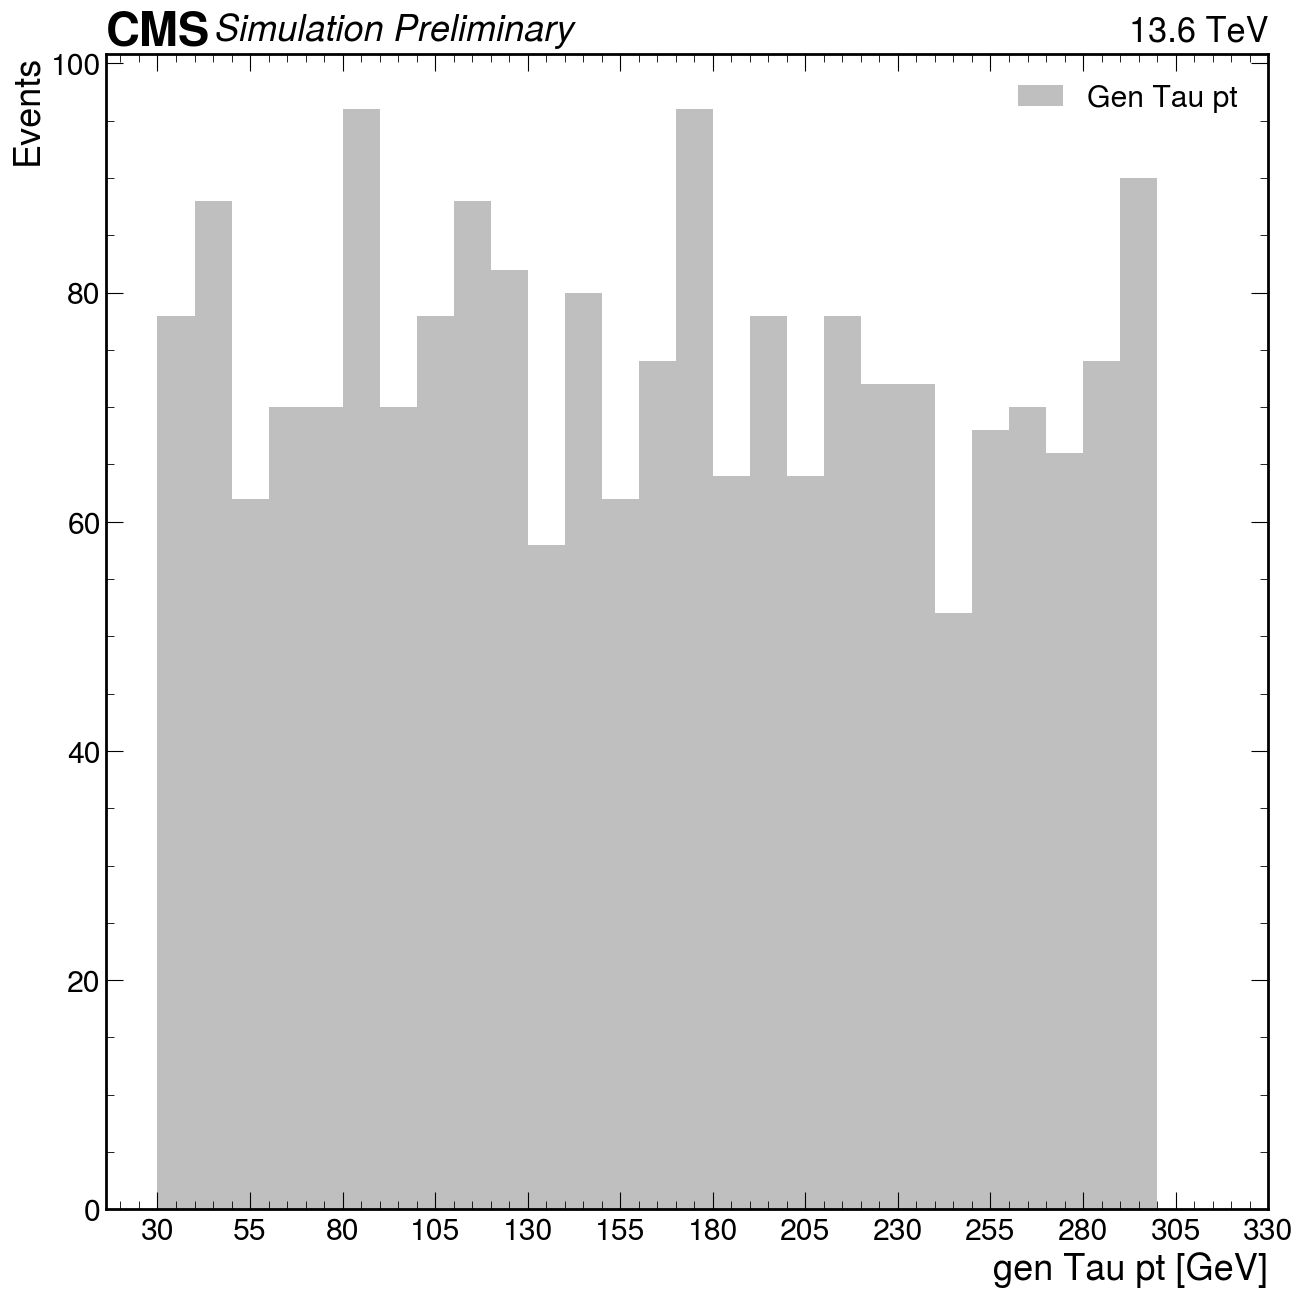

In [19]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_pt,bins=np.arange(30,320,10),color='grey',alpha=0.5,label="Gen Tau pt",log=0)
plt.xticks(np.arange(30,350,25))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

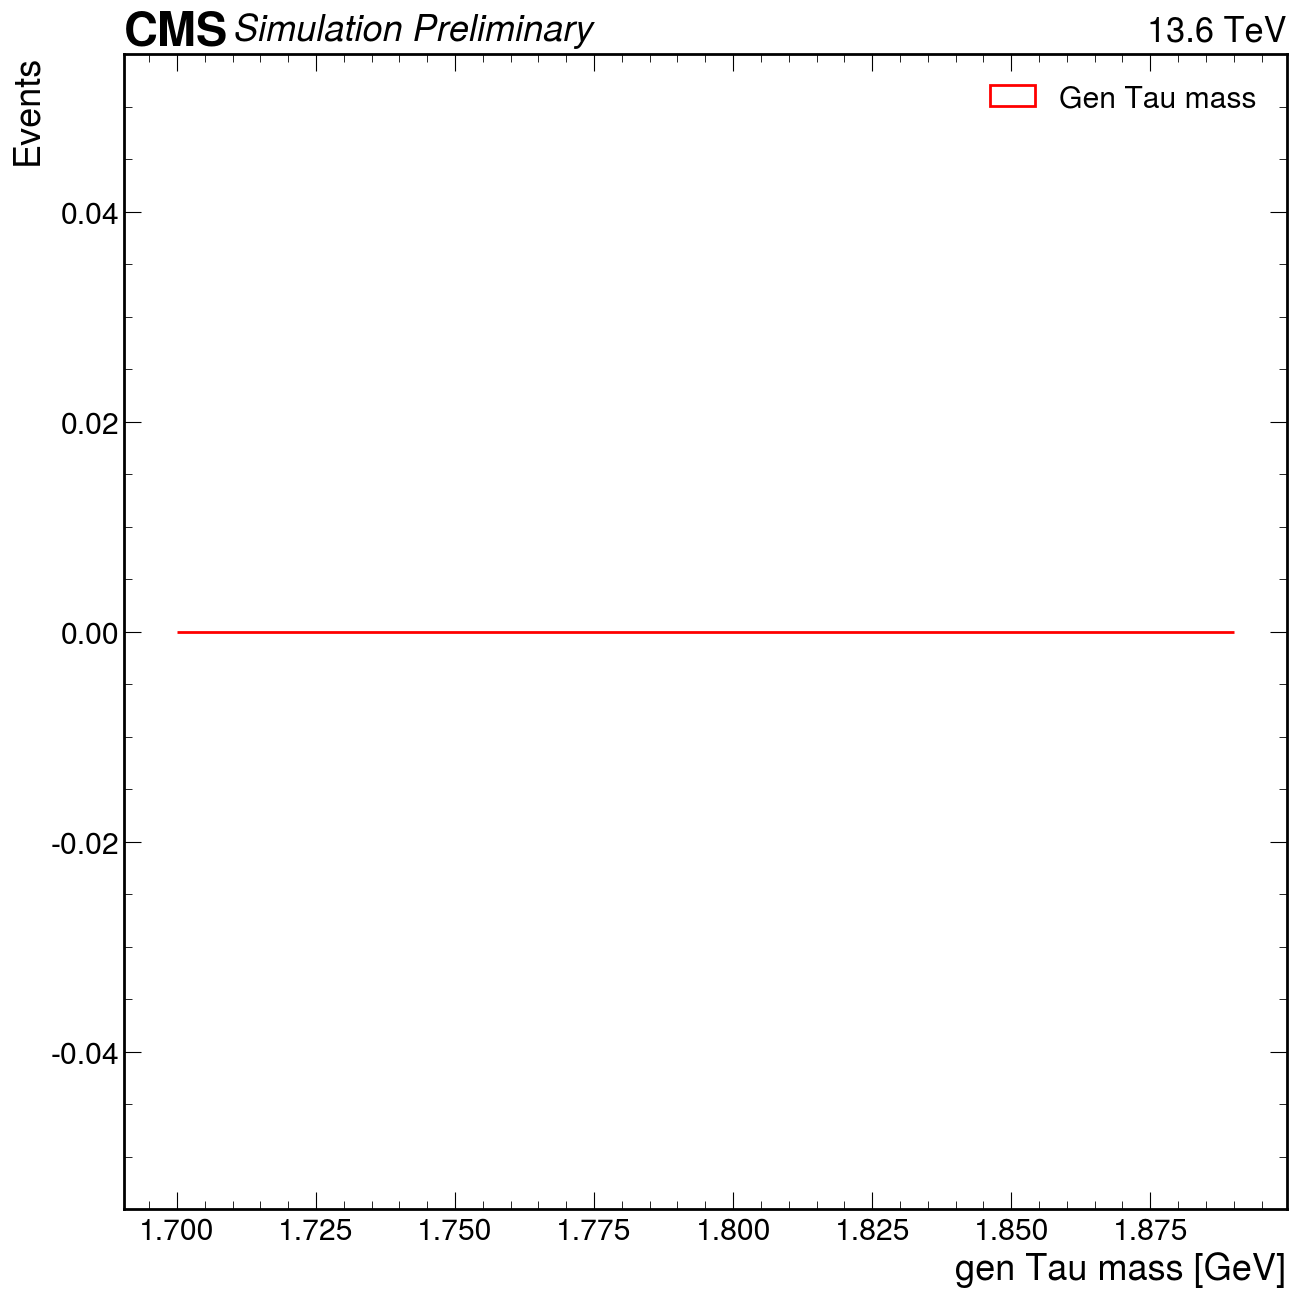

In [8]:
GenTau = RHTree.arrays(["GenTau_inv"],"GenTau_inv > -111",library="pd")['GenTau_inv']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenTau,bins=np.arange(1.7,1.9,0.01),histtype='step',linestyle='-',linewidth=2, color='red',label="Gen Tau mass")
# plt.xticks(np.arange(3.6,17,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau mass [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

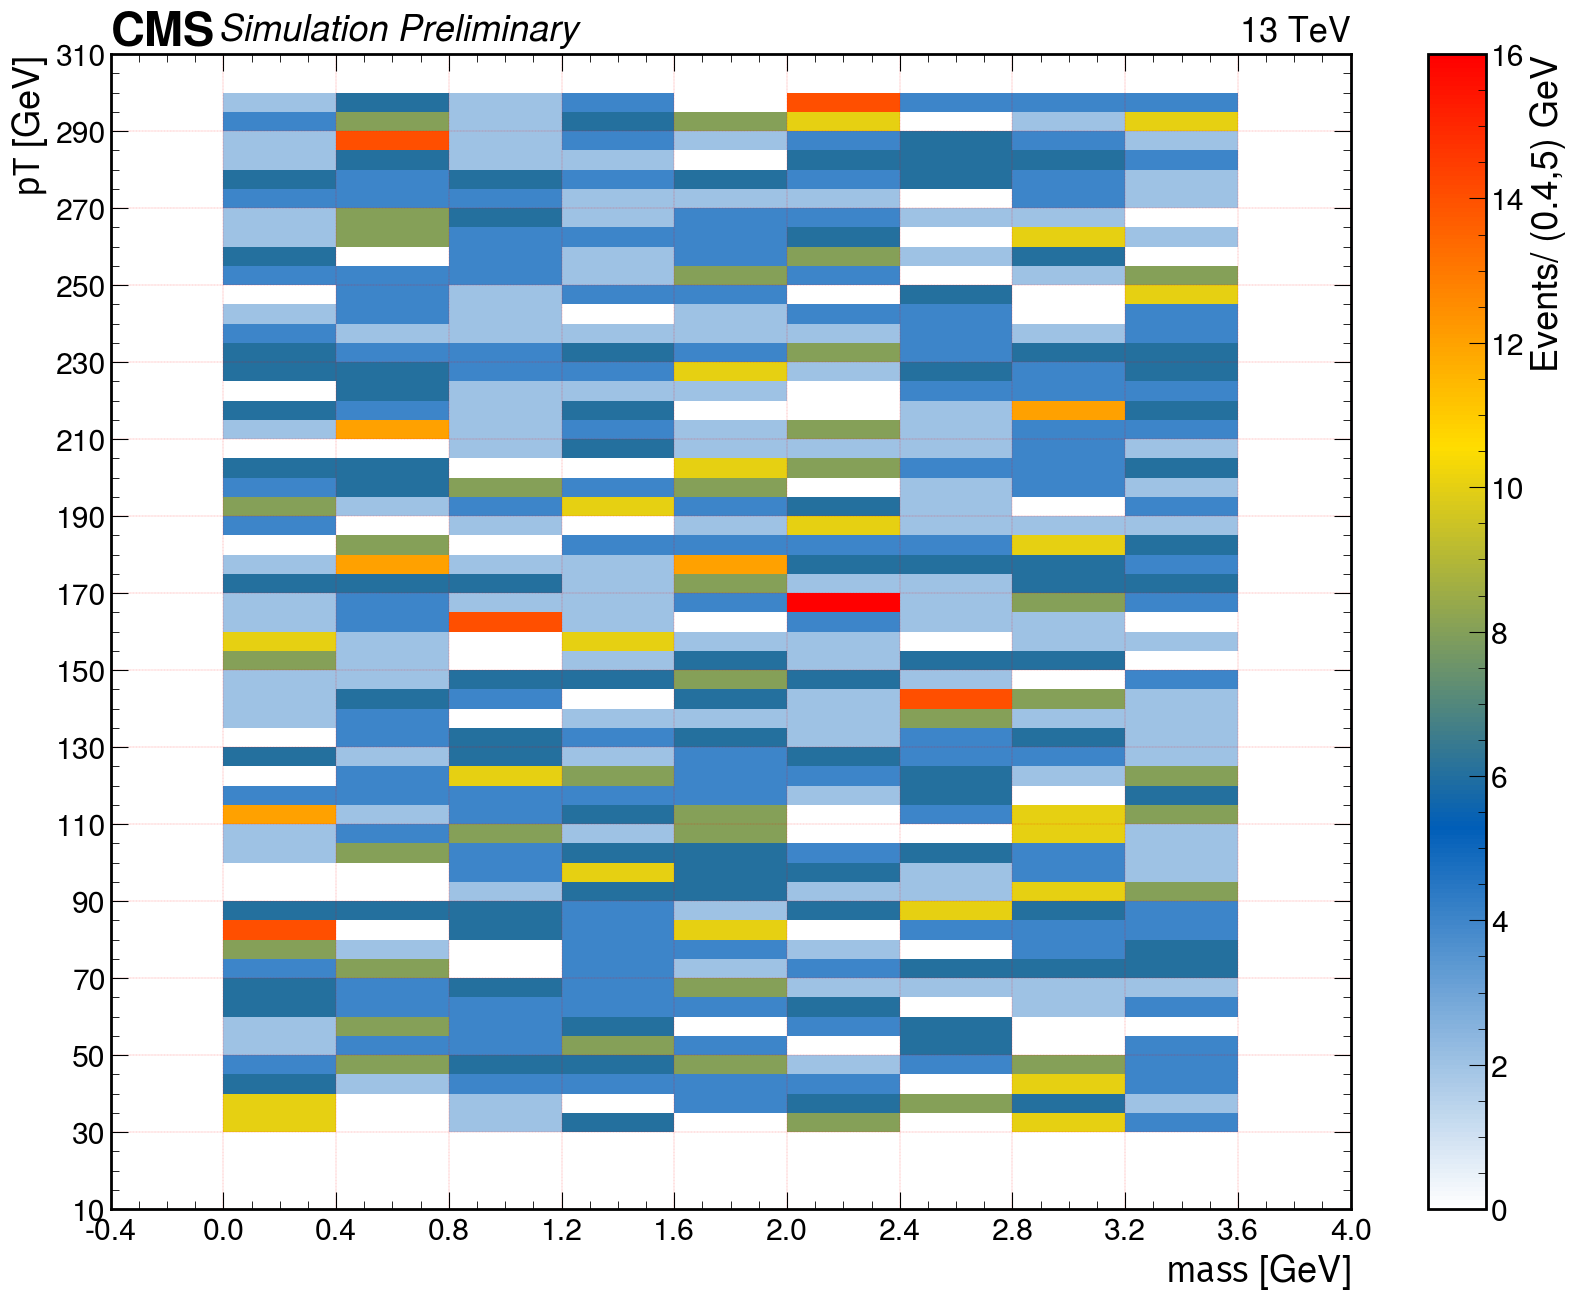

In [15]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
GenA1 = new_mass(GenA1)
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
mass_bins =np.arange(-0.4, 4.1, .4)
pt_bins = np.arange(30,305,5)
fig, ax = plt.subplots(figsize=(20,15))
# norm = mcolors.TwoSlopeNorm(vmin=5000, vmax = 7000, vcenter=5500)
plt.hist2d(GenA1, A1_pt, bins=[mass_bins, pt_bins],cmap=cms_cmap)
plt.xticks(np.arange(-0.4, 4.1, .4))
plt.yticks(np.arange(10,320,20))
plt.xlabel(r'$\mathrm{mass}$ [GeV]')
plt.ylabel(r'$\mathrm{pT}$ [GeV]')
plt.colorbar().set_label(label='Events/ (0.4,5) GeV')
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)


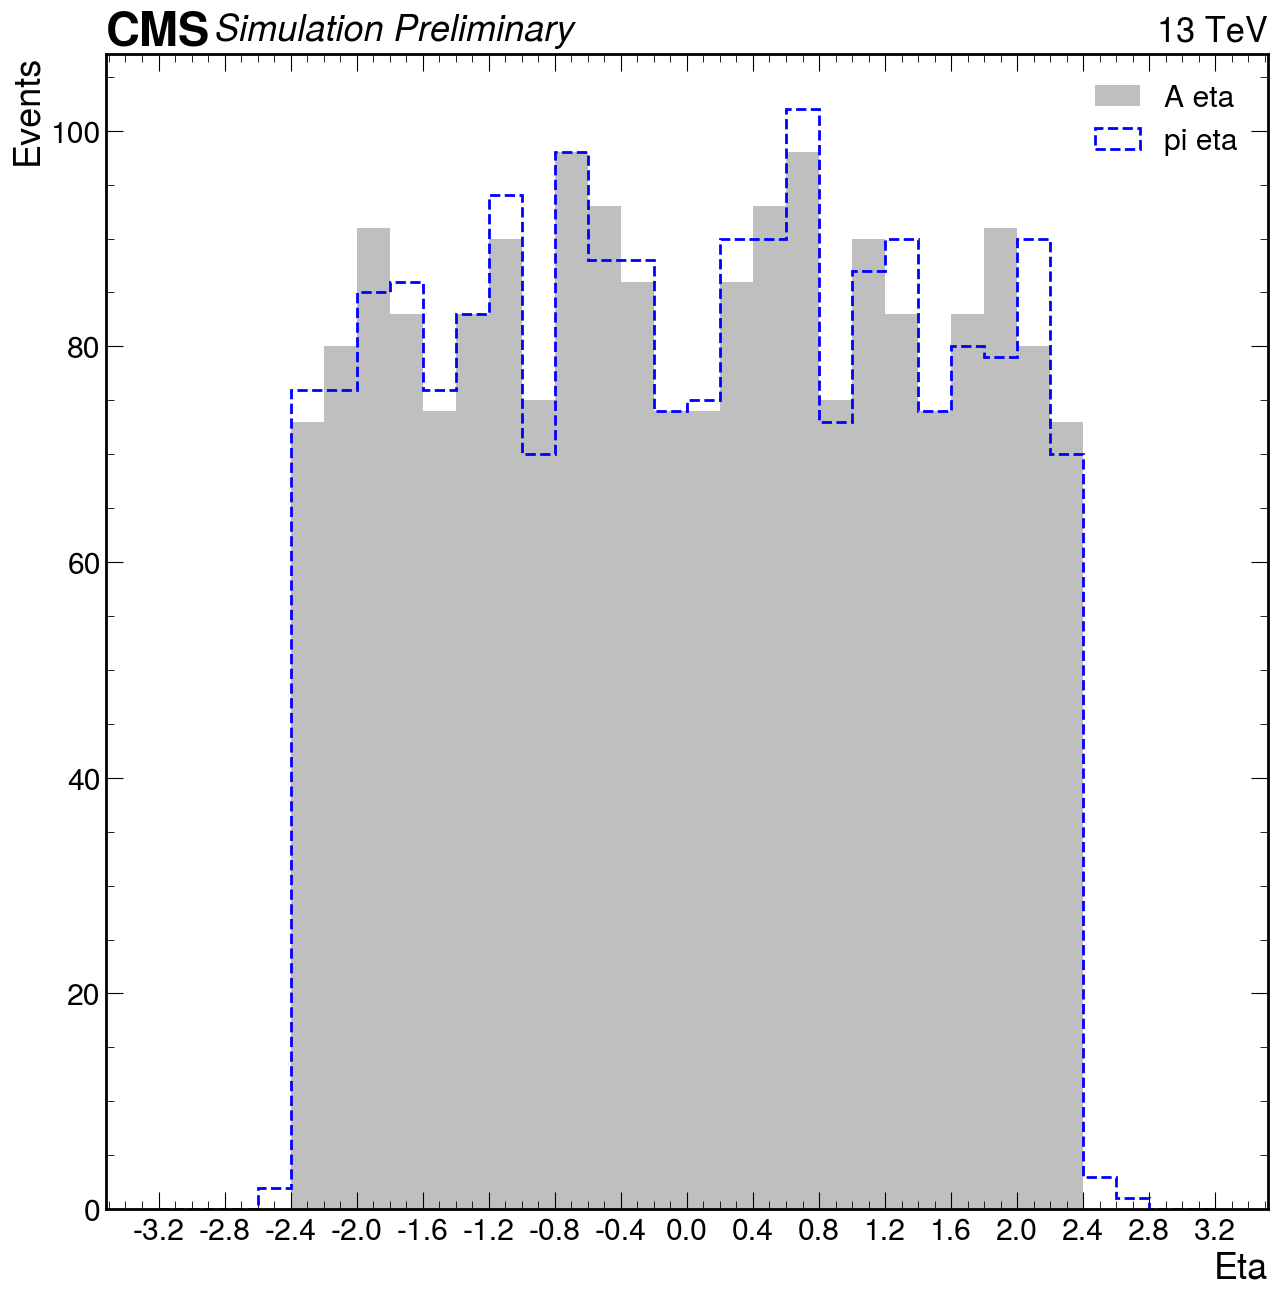

In [16]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_eta,bins=np.arange(-3.2,3.4,.2),color='grey',alpha=0.5,label="A eta")
plt.hist(Tau1_eta,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="pi eta")

plt.xticks(np.arange(-3.2,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("Eta")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_Tau_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

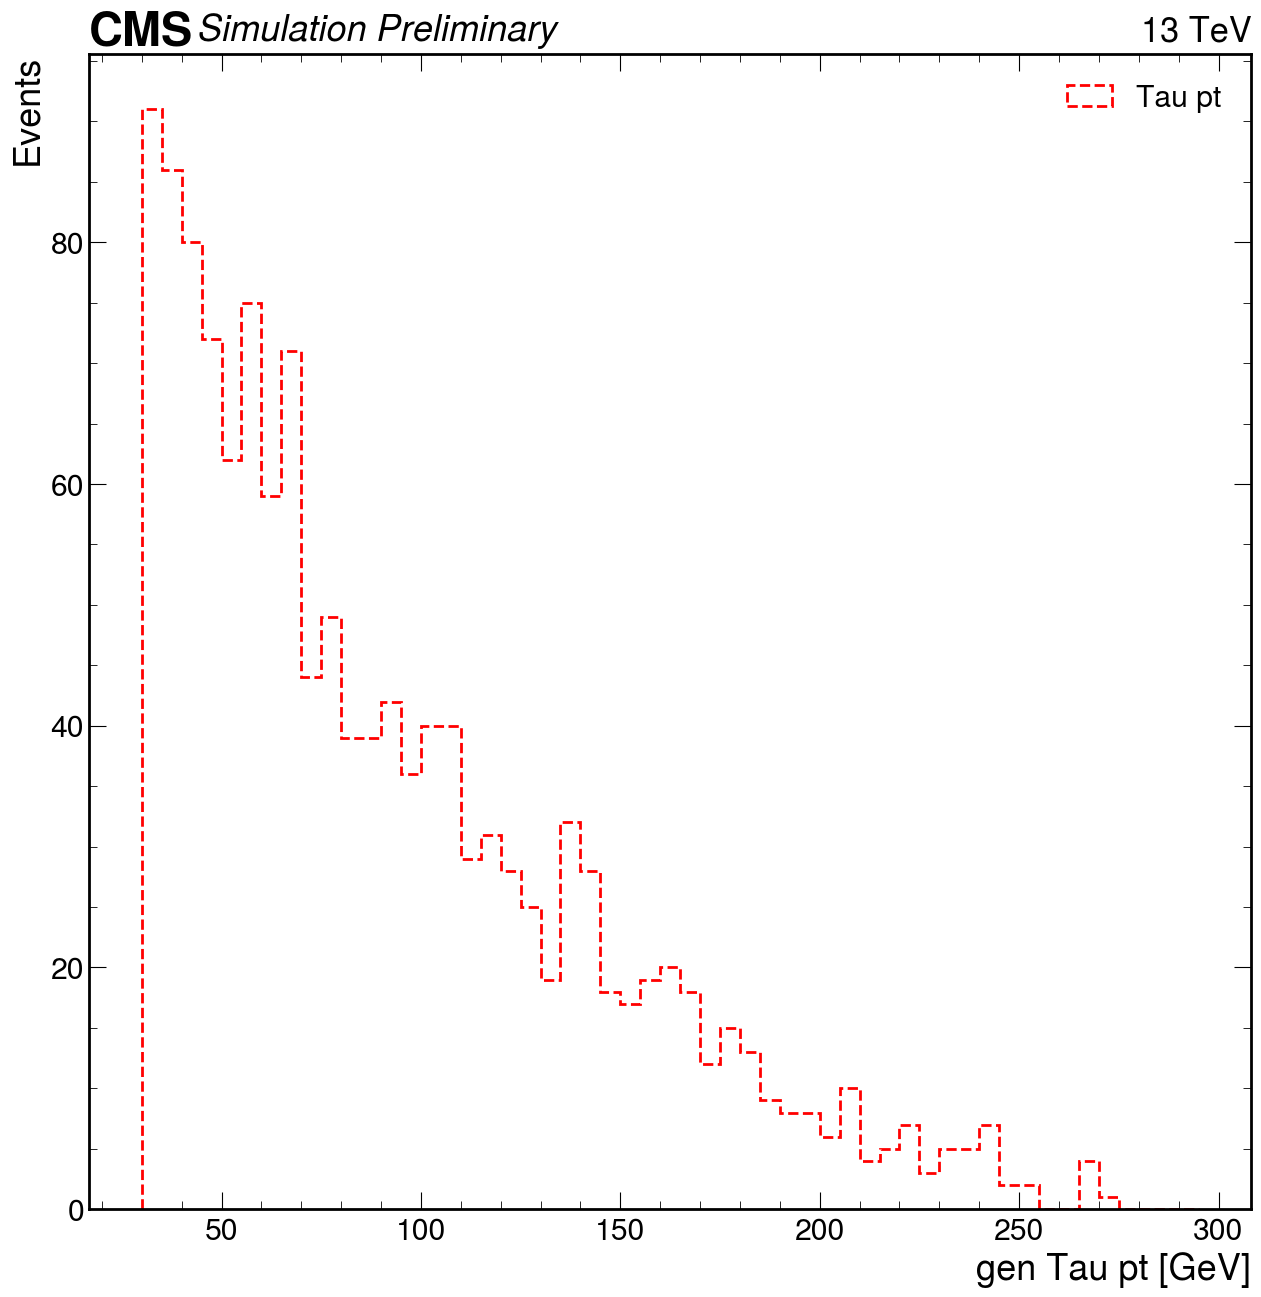

In [17]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt,bins=np.arange(30,300,5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau pt")


# plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

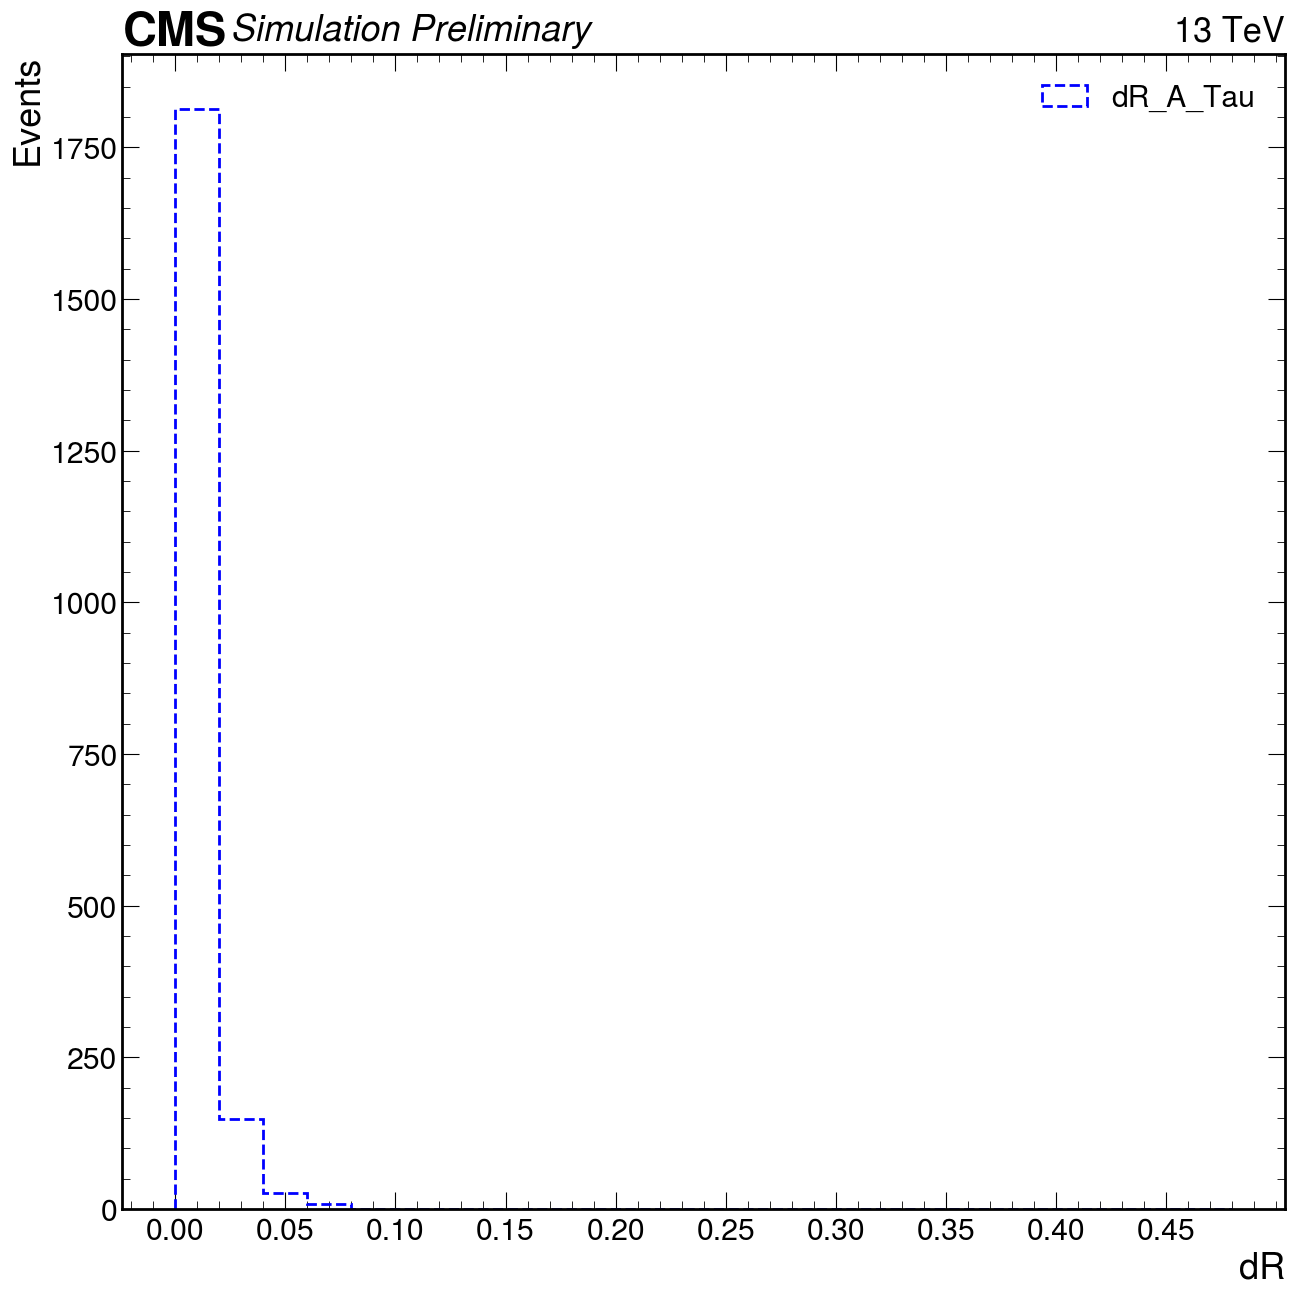

In [28]:
dR_A1_Tau1 = RHTree.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_A1_Tau1,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A_Tau")


plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()